
#### 12/23/20 : *moved here and assemble all trials for pile bearing capacity*

#### based on the books
* ##### introduction to 02 ML with Python - A.C.Müller,S.Guido
* #####  Hands-On, Géron
---

In [1]:
from preamble import *
%matplotlib inline


In [2]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 1.1.5
matplotlib 버전: 3.3.2
NumPy 버전: 1.16.6
SciPy 버전: 1.5.0
IPython 버전: 7.18.1
scikit-learn 버전: 0.22


### ***************  skills to handle the data
### following mainly "Hands on ML"
--------------------------------------------

## Get the data

### *download data*

#####  pandas data reading 12/11/20 by blee
##### copied from 04-representing-data-.....

In [3]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "pile.csv"), header=None, index_col=False,
    names=['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure','qpredict',
         'source', 'testnum', 'site'  ], encoding='cp949')

# 예제를 위해 몇개의 열만 선택합니다
data = data[['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure','qpredict']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,phishaft,phitop,sigvtip,length,area,qmeasure,qpredict
0,33.0,38.0,255,24.5,0.13,2615,2494
1,34.0,37.5,206,19.8,0.22,3674,3638
2,33.0,38.0,223,21.5,0.13,2164,2389
3,33.0,37.5,210,20.2,0.15,3042,2881
4,33.0,37.0,206,19.9,0.18,2856,2831


### *Take a Quick Look at the Data Structure*

In [4]:
print(data.keys())
print(data.shape)



Index(['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure',
       'qpredict'],
      dtype='object')
(59, 7)


In [5]:
# p 48

#data.loc[:,['pileshaft','area']]
#data[:,['phishaft']]
data.head()
data.tail()
data.index
data.columns
#data.describe()
#data[0:3]
#data.loc[:,['phishaft','area']]
#data.iloc[:,0:5]
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   phishaft  59 non-null     float64
 1   phitop    59 non-null     float64
 2   sigvtip   59 non-null     int64  
 3   length    59 non-null     float64
 4   area      59 non-null     float64
 5   qmeasure  59 non-null     int64  
 6   qpredict  59 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 3.4 KB


,phishaft,phitop,sigvtip,length,area,qmeasure,qpredict
count,59.00,59.00,59.00,59.00,5.90e+01,59.00,59.00
mean,34.87,36.41,179.80,17.49,1.34e-01,2144.80,2077.41
std,2.13,2.11,82.39,7.96,1.03e-01,1294.88,1365.60
min,28.00,31.00,38.00,3.00,6.10e-03,2.00,1.00
25%,33.50,35.00,125.50,12.20,7.64e-02,1183.50,1009.50
50%,35.00,36.00,169.00,16.50,9.99e-02,1913.00,1790.00
75%,35.75,37.50,214.00,21.15,1.64e-01,3055.50,2864.00
max,39.00,41.00,475.00,47.20,6.57e-01,5604.00,5604.00


<AxesSubplot:>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


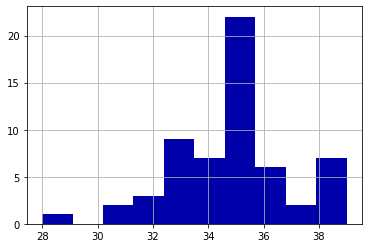

In [6]:
data["phishaft"].hist()

array([[<AxesSubplot:title={'center':'phishaft'}>,
        <AxesSubplot:title={'center':'phitop'}>,
        <AxesSubplot:title={'center':'sigvtip'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'qmeasure'}>],
       [<AxesSubplot:title={'center':'qpredict'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


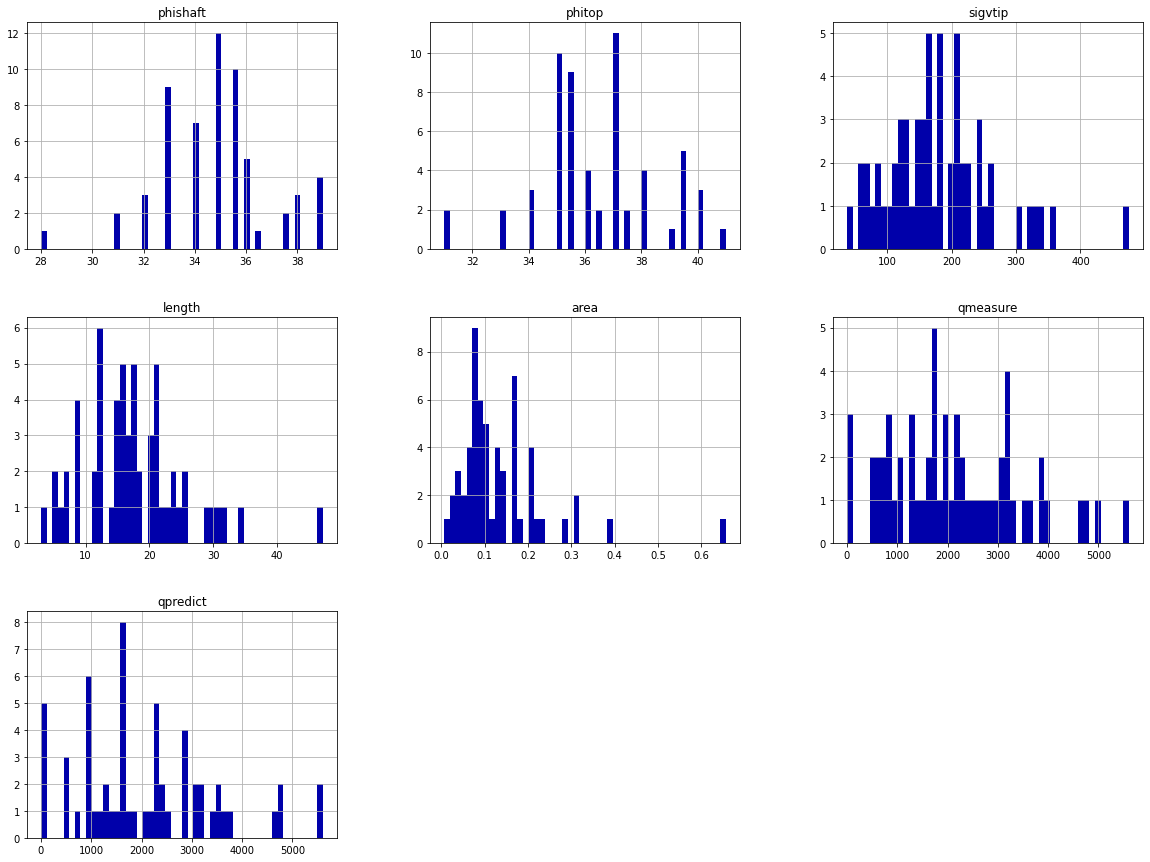

In [9]:
# p49 Hands on

data.hist(bins=50, figsize=(20,15))



### *create a test set*


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Discover and Visualize the Data to Gain Insights

### *Visualizing data*

P56

<AxesSubplot:xlabel='phitop', ylabel='qmeasure'>

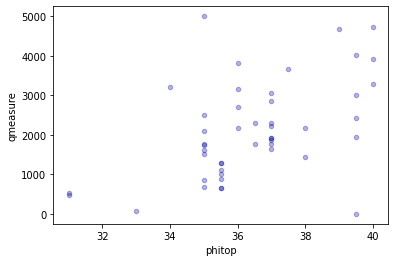

In [8]:
data1 = train_set.copy()
data1.plot(kind="scatter", x="phitop", y="qmeasure",alpha=0.3)

<AxesSubplot:xlabel='phitop', ylabel='qmeasure'>

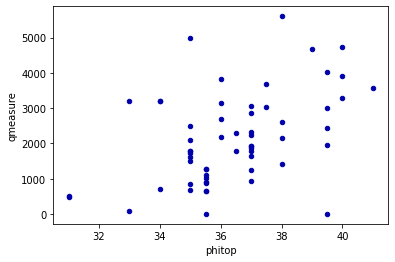

In [20]:
data.plot(kind="scatter", x="phitop", y="qmeasure")


<AxesSubplot:xlabel='phishaft', ylabel='phitop'>

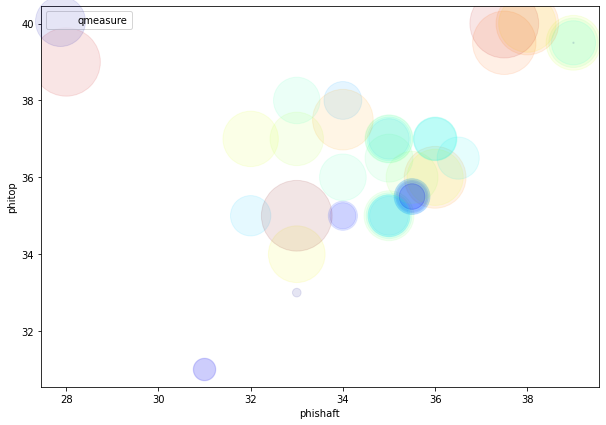

In [19]:
data1.plot(kind="scatter", x="phishaft", y="phitop", alpha=0.1,
          s=data1["qmeasure"], label="qmeasure",figsize=(10,7),
#          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=True)
          c="qmeasure", cmap=plt.get_cmap("jet"), colorbar=False)
#plt.legend()
#plt.show()
#see the high-density areas by alpha

### *Looking for corrlations*

In [21]:
# p58

corr_matrix = data1.corr()
corr_matrix["qmeasure"].sort_values(ascending=False)

qmeasure    1.00
qpredict    0.90
area        0.67
phitop      0.50
sigvtip     0.47
length      0.38
phishaft    0.03
Name: qmeasure, dtype: float64

array([[<AxesSubplot:xlabel='qmeasure', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='area', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='length', ylabel='qmeasure'>,
        <AxesSubplot:xlabel='phitop', ylabel='qmeasure'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='length', ylabel='area'>,
        <AxesSubplot:xlabel='phitop', ylabel='area'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='length'>,
        <AxesSubplot:xlabel='area', ylabel='length'>,
        <AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='phitop', ylabel='length'>],
       [<AxesSubplot:xlabel='qmeasure', ylabel='phitop'>,
        <AxesSubplot:xlabel='area', ylabel='phitop'>,
        <AxesSubplot:xlabel='length', ylabel='phitop'>,
        <AxesSubplot:xlabel='phitop', ylabel='phitop'>]], dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


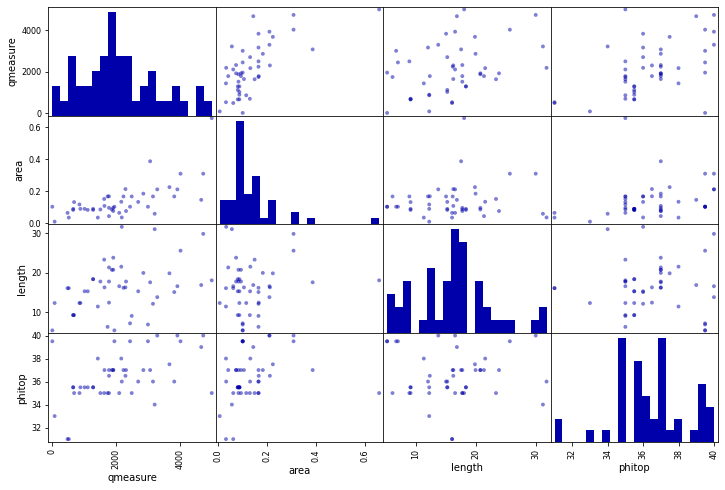

In [22]:
from pandas.plotting import scatter_matrix
#attributes = ["qmeasure", "phishaft", "area", "phitop"]
attributes = ["qmeasure", "area", "length", "phitop"]
scatter_matrix(data1[attributes], figsize=(12,8),  s=60, alpha=.5,
                hist_kwds={'bins': 20})

(0.0, 0.8, 0.0, 6000.0)

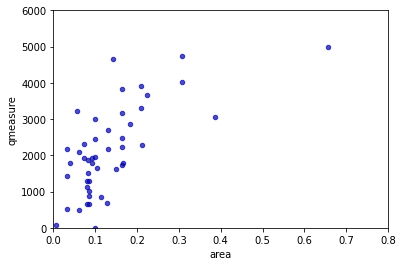

In [23]:
data1.plot(kind="scatter", x="area", y="qmeasure",
             alpha=0.7)
plt.axis([0, 0.8, 0, 6000])

### *Experimenting with Attribute Combinations*


In [20]:
data["sigv_normal"] = data["sigvtip"]/data["length"]
data["phishaft_normal"] = data["phishaft"]/data["area"]

corr_matrix = data.corr()
corr_matrix["qmeasure"].sort_values(ascending=False)

qmeasure           1.00e+00
qpredict           8.73e-01
area               6.74e-01
phitop             4.61e-01
sigvtip            4.46e-01
length             3.86e-01
sigv_normal        3.26e-01
phishaft           5.65e-03
phishaft_normal   -3.71e-01
Name: qmeasure, dtype: float64

In [29]:
data1.describe()

,phishaft,phitop,sigvtip,length,area,qmeasure,qpredict
count,47.00,47.00,47.00,47.00,4.70e+01,47.00,47.00
mean,35.03,36.44,165.26,16.12,1.36e-01,2122.51,2092.34
std,2.22,2.10,66.08,6.30,1.09e-01,1228.04,1310.81
min,28.00,31.00,56.00,5.20,6.10e-03,2.00,1.00
25%,34.00,35.00,119.50,12.20,7.99e-02,1281.00,1114.50
50%,35.00,36.00,163.00,16.20,9.99e-02,1913.00,1803.00
75%,36.00,37.25,206.00,19.05,1.64e-01,2928.00,2839.00
max,39.00,40.00,354.00,31.70,6.57e-01,5000.00,5604.00


## Prepare the data for ML algorithm
* *Data Cleaning*
* *Handling Text and Categorical Attributes*
* *Custom Transformers*
* *Feature Scaling*
* *Transformation Pipelines*

---

In [9]:
# make feature X, target y for data
# Boston data : used mglearn.datasets.load_extended_boston()
# iris data is already composed of iris_dataset['data'], iris_dataset['target']

# p216

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))
# extract numpy arrays
features = data_dummies.iloc[:,0:5]
X = features.values
f_all=  data_dummies.iloc[:,0:7]
X_all = f_all.values
y = data['qmeasure'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
print("X_all.shape: {}".format(X_all.shape))

Original features:
 ['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure', 'qpredict'] 

Features after get_dummies:
 ['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure', 'qpredict']
X.shape: (59, 5) y.shape: (59,)
X_all.shape: (59, 7)


In [10]:
# p 53 int to ML with python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# needs stratified sampling for small data set: make strata and sample right number of instances from each stratum ....

## Select and Train a Model
* *training and evaluatin on the training set*
* *better evaluation using cross-validations*

---

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0:5], y_train)
#lr = LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data1.iloc[:3, 0:5].values
some_labels = data1.iloc[:3, 6].values
#some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [4004.375 1643.005 1639.023]
Labels: [4733, 2371, 1669]


In [80]:
from sklearn.metrics import mean_squared_error
some_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, some_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


594.9146572614142

#### try for other number of samples

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train[:,0:2], y_train)
#lr = LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data1.iloc[:3, 0:2].values
some_labels = data1.iloc[:3, 6].values
#some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [2837.991 2508.123 2354.194]
Labels: [4733, 2371, 1669]


In [17]:
from sklearn.metrics import mean_squared_error
some_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, some_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1166.0977108198826

In [18]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(some_labels, some_predictions)
lin_mae

905.7751340140625

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [22]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

207.44429701400895

In [23]:
print(data.keys())
print(data.shape)

Index(['phishaft', 'phitop', 'sigvtip', 'length', 'area', 'qmeasure',
       'qpredict'],
      dtype='object')
(59, 7)


---
### 말뚝 지지력 머신러닝 적용

* 데이터 구조
    * feature(특성) : 측면마찰각, 선단마찰각, 선단유효응력, 길이, 단면적
    * label : 측정값, 계산값

#### *better evaluation using cross-validations*
Scikit-Learn’s K-fold cross-validation

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [26]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 533.628  917.909  363.542 1463.1   1067.446  527.226 1356.725  693.617
  982.811 1059.674]
Mean: 896.5679000817236
Standard deviation: 344.94115518889413


In [27]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 784.159  537.216  457.389  996.034  703.659  455.674  459.204  291.496
  511.561 1294.294]
Mean: 649.0687464779714
Standard deviation: 287.64531561004856


In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [29]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

381.74357733440087

In [31]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 624.085  927.942  520.427 1147.41  1277.424  433.492  795.188  528.766
  480.028 1244.85 ]
Mean: 797.9612873138035
Standard deviation: 313.40950363508216


In [32]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()


count      10.00
mean      649.07
std       303.20
min       291.50
25%       457.84
50%       524.39
75%       764.03
max      1294.29
dtype: float64

## Fine-tune the model
* *grid search*
* *randomized search*
* *ensemble methods*
* *analyze the best models and their errors*
* *evaluate the system on the test set
---

## Lanunch, monitor, and maintain the system

# ============
### int. to ML with python by Muller and Guido
---



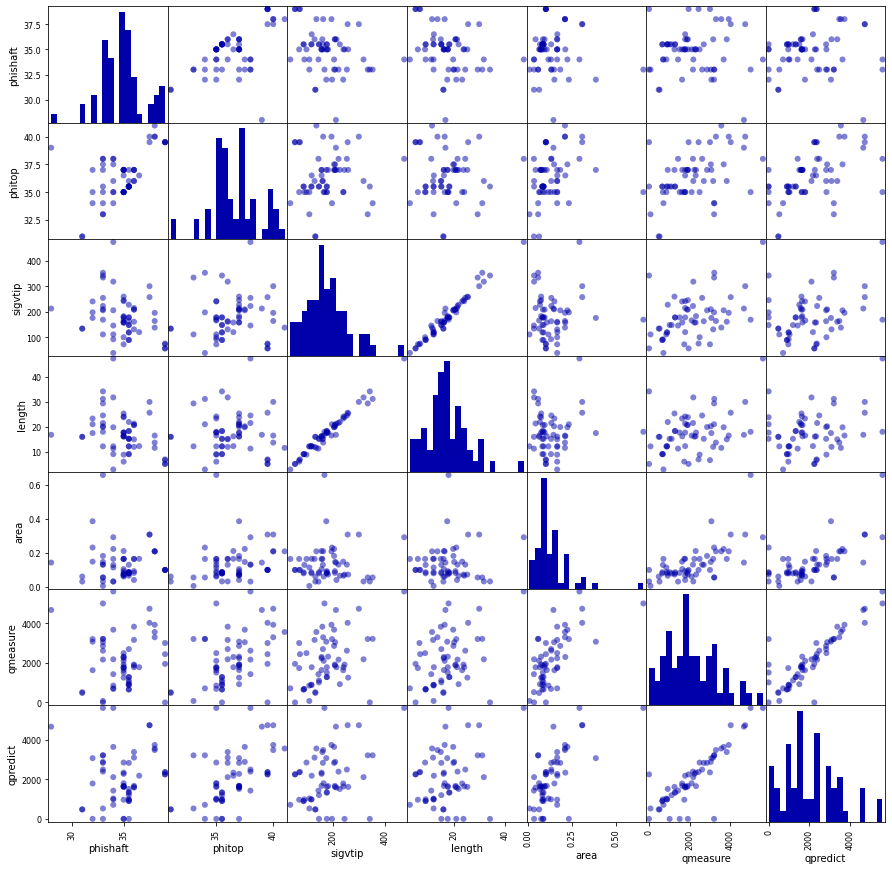

In [26]:
import mglearn
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
#X_dataframe = pd.DataFrame(X, columns=data.columns[0:5])
X_dataframe = pd.DataFrame(X_all, columns=data.columns[0:7])
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
#pd.plotting.scatter_matrix(X_dataframe, c=y, figsize=(15, 15), marker='o',
#                           hist_kwds={'bins': 20}, s=30, alpha=.5, cmap=mglearn.cm3)
pd.plotting.scatter_matrix(X_dataframe,   figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20})
plt.show() # 책에는 없음

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
logreg = LogisticRegression()
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [  16.282   66.777   36.566 -308.942 6939.126]
lr.intercept_: -2902.7591711026203
Training set score: 0.78
Test score: 0.66


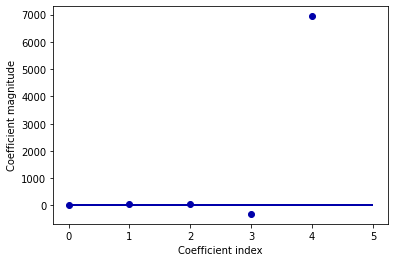

In [34]:
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   phishaft         59 non-null     float64
 1   phitop           59 non-null     float64
 2   sigvtip          59 non-null     int64  
 3   length           59 non-null     float64
 4   area             59 non-null     float64
 5   qmeasure         59 non-null     int64  
 6   qpredict         59 non-null     int64  
 7   sigv_normal      59 non-null     float64
 8   phishaft_normal  59 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 4.3 KB
